In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image


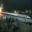

In [2]:
img=Image.open("./cifar10/test/airplane/1001_airplane.png")
img

In [3]:
img.size

(32, 32)

In [4]:
data=tf.keras.utils.image_dataset_from_directory(
    "./cifar10/train/",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=50000
)
data

Found 50000 files belonging to 10 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10),
    layers.Softmax()
    
])

In [6]:
#model.build(input_shape=(1,32,32,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0

In [7]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

In [8]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,10)
    print(features.shape,labels.shape)
    record=model.fit(features,labels,batch_size=50,epochs=5)

(50000, 32, 32, 3) (50000, 10)
Epoch 1/5
1000/1000 [==============================] - 213s 205ms/step - loss: 1.5497 - accuracy: 0.4422
Epoch 2/5
1000/1000 [==============================] - 211s 211ms/step - loss: 1.2181 - accuracy: 0.5702
Epoch 3/5
1000/1000 [==============================] - 207s 207ms/step - loss: 1.0859 - accuracy: 0.6186
Epoch 4/5
1000/1000 [==============================] - 206s 206ms/step - loss: 0.9942 - accuracy: 0.6512
Epoch 5/5
1000/1000 [==============================] - 207s 208ms/step - loss: 0.9294 - accuracy: 0.6761


In [9]:
model=model.save("cifar.h5",save_format="h5")

In [10]:
model=tf.keras.models.load_model("cifar.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0